<a href="https://colab.research.google.com/github/dohyeondol1/School-lesson/blob/main/lesson9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


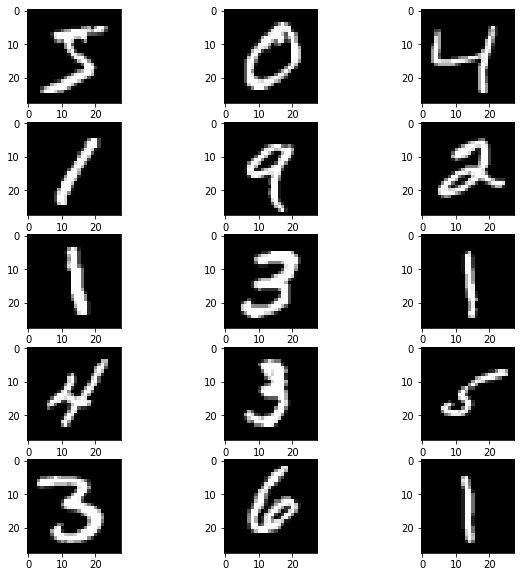

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


In [2]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
c = 0
for x in range(5):
    for y in range(3):
        plt.subplot(5,3,c+1)
        plt.imshow(x_train[c], cmap='gray')
        c+=1
    
plt.show()

print(y_train[:15])

In [3]:
# 모델 레이어 설정
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
         
# 모델의 모습을 표로 출력
model.summary()
     
# 위의 레이어를 가진 모델로 5번 학습시킴
print(model.fit(x_train, y_train, epochs=5))

# 검증을 해봄
print(model.evaluate(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2965 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.142

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=64),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=3, filters=32),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# 옵티마이저와 손실함수를 설정하고 정확도 매트릭스가 나오게 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
         
# 모델의 모습을 표로 출력
model.summary()
     
# 위의 레이어를 가진 모델로 5번 학습시킴
print(model.fit(x_train, y_train, epochs=5))

# 검증을 해봄
print(model.evaluate(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 15488)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [6]:
from google.colab import auth
from google.colab import drive
drive.mount('/content/gdrive')
 
%cd ~/../content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


(28, 28)


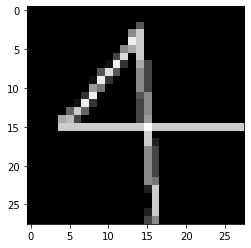

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.imread('./test.png', cv2.IMREAD_GRAYSCALE)
ret , binary = cv2.threshold(src,170,255,cv2.THRESH_BINARY_INV)
myNum = np.asarray(cv2.resize(binary, dsize=(28, 28), interpolation=cv2.INTER_AREA))/255

plt.imshow(myNum, cmap='gray')
print(myNum.shape)

In [8]:
categoris = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

print(np.argmax(model.predict(myNum.reshape(-1, 28, 28, 1))[0]))

1/1 [==============================] - 0s 187ms/step
4
